In [1]:
np.random.seed(0)
x0 = sp.stats.multivariate_normal([-2,-2],[[1,0.9],[0.9,2]]).rvs(40)
x1 = sp.stats.multivariate_normal([2,2],[[1.2,-0.8],[-0.8,2]]).rvs(60)

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
from sklearn.naive_bayes import GaussianNB

In [5]:
model = GaussianNB().fit(iris.data, iris.target)

In [7]:
from sklearn.metrics import confusion_matrix

In [8]:
confusion_matrix(iris.target, model.predict(iris.data))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]], dtype=int64)

In [9]:
from sklearn.metrics import classification_report

In [10]:
print(classification_report(iris.target, model.predict(iris.data)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.94      0.94      0.94        50
          2       0.94      0.94      0.94        50

avg / total       0.96      0.96      0.96       150



In [11]:
from sklearn.metrics import roc_curve

In [ ]:
fpr = [None] * 3
tpr = [None] * 3
threshold = [None] * 3

for i in range(3):
    fpr[i], tpr[i], threshold[i] = roc_curve(iris.target, model.predict_proba(iris.data)[,:1])
    plt.plot()

In [13]:
from sklearn.preprocessing import Binarizer

In [14]:
from sklearn.datasets import load_digits

In [16]:
digit = load_digits()
digit.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [19]:
set(digit.target)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [30]:
binar = Binarizer(threshold=8).fit(digit.data)

In [31]:
data = binar.transform(digit.data)
data

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  1.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  1., ...,  1.,  0.,  0.]])

In [24]:
from sklearn.naive_bayes import BernoulliNB

In [25]:
model = BernoulliNB().fit(data, digit.target)

In [26]:
model.predict(data)

array([0, 1, 1, ..., 8, 9, 8])

In [28]:
confusion_matrix(digit.target, model.predict(data))

array([[171,   0,   0,   0,   1,   3,   2,   0,   0,   1],
       [  0, 146,   8,   0,   0,   1,   3,   0,  13,  11],
       [  1,   8, 156,   3,   0,   0,   0,   1,   4,   4],
       [  0,   2,   2, 155,   0,   2,   0,   7,   5,  10],
       [  0,   3,   0,   0, 168,   1,   1,   5,   3,   0],
       [  0,   0,   1,   2,   2, 166,   0,   0,   0,  11],
       [  1,   5,   0,   0,   2,   0, 171,   0,   2,   0],
       [  0,   0,   2,   0,   0,   0,   0, 175,   1,   1],
       [  0,  15,   7,   1,   0,   5,   0,   2, 139,   5],
       [  0,   0,   0,   3,   0,   3,   0,   8,   4, 162]], dtype=int64)

In [29]:
print(classification_report(digit.target, model.predict(data)))

             precision    recall  f1-score   support

          0       0.99      0.96      0.97       178
          1       0.82      0.80      0.81       182
          2       0.89      0.88      0.88       177
          3       0.95      0.85      0.89       183
          4       0.97      0.93      0.95       181
          5       0.92      0.91      0.91       182
          6       0.97      0.94      0.96       181
          7       0.88      0.98      0.93       179
          8       0.81      0.80      0.81       174
          9       0.79      0.90      0.84       180

avg / total       0.90      0.90      0.90      1797



In [41]:
theta = np.exp(model.feature_log_prob_)[1,:]

In [42]:
theta = theta.reshape(8,8)

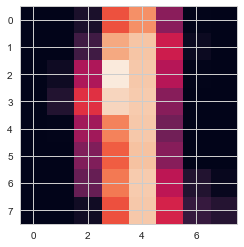

In [43]:
plt.imshow(theta)
plt.show()

In [44]:
from sklearn.naive_bayes import MultinomialNB

In [45]:
model = MultinomialNB().fit(digit.data, digit.target)

In [47]:
predict = model.predict(digit.data)

In [48]:
confusion_matrix(digit.target, predict)

array([[175,   0,   0,   0,   3,   0,   0,   0,   0,   0],
       [  0, 137,  14,   0,   0,   1,   2,   0,  13,  15],
       [  0,   7, 160,   0,   0,   0,   0,   0,   8,   2],
       [  0,   0,   2, 159,   0,   2,   0,   5,   8,   7],
       [  1,   0,   0,   0, 173,   0,   0,   4,   3,   0],
       [  0,   0,   0,   0,   1, 157,   1,   1,   2,  20],
       [  0,   2,   0,   0,   1,   1, 176,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 178,   1,   0],
       [  0,  11,   1,   0,   1,   0,   1,   1, 154,   5],
       [  0,   1,   0,   1,   1,   1,   0,  11,   7, 158]], dtype=int64)

In [49]:
print(classification_report(digit.target, predict))

             precision    recall  f1-score   support

          0       0.99      0.98      0.99       178
          1       0.87      0.75      0.81       182
          2       0.90      0.90      0.90       177
          3       0.99      0.87      0.93       183
          4       0.96      0.96      0.96       181
          5       0.97      0.86      0.91       182
          6       0.98      0.97      0.98       181
          7       0.89      0.99      0.94       179
          8       0.78      0.89      0.83       174
          9       0.76      0.88      0.82       180

avg / total       0.91      0.91      0.91      1797

